In [2]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data
df = pd.read_csv(r'C:\Users\Chr041921\Downloads\titles.csv', low_memory=False)

In [49]:
# Let's look at the data

df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [50]:
# Discerning null data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

id - 0.0%
title - 0.0%
type - 0.0%
description - 0.012055516158443927%
release_year - 0.0%
age_certification - 0.6571775909229055%
runtime - 0.0%
genres - 0.0%
production_countries - 0.0%
seasons - 0.8625265930503495%
imdb_id - 0.06757167460237058%
imdb_score - 0.1034343025022794%
imdb_votes - 0.1044473710870226%
tmdb_popularity - 0.055414851585452334%
tmdb_score - 0.21092087934353157%


In [51]:
# Column data types

df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

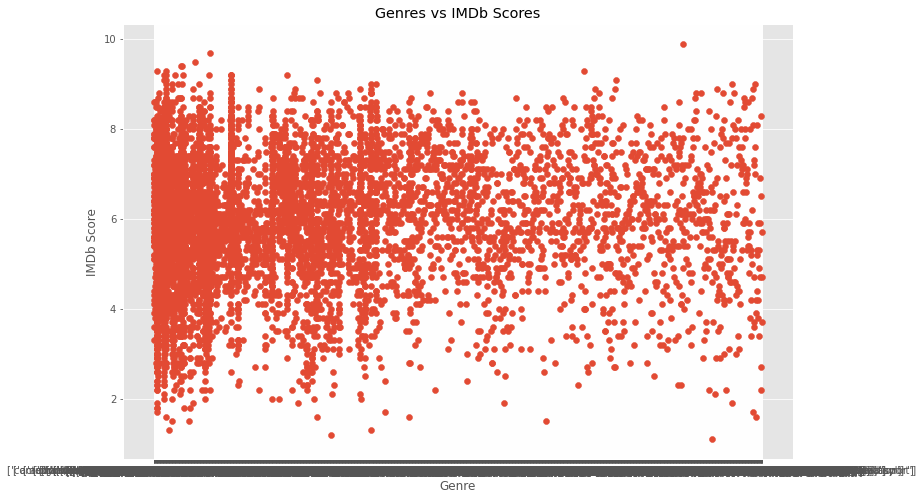

In [3]:
# Scatter plot for Genres and IMDb Scores

plt.scatter(x=df['genres'], y=df['imdb_score'])
plt.title('Genres vs IMDb Scores')
plt.xlabel('Genre')
plt.ylabel('IMDb Score')
plt.show()

In [5]:
# Looking at correlation

df.corr(method = 'pearson')

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,0.062811,-0.410655,0.034449,0.024487,0.071576,0.130082
runtime,0.062811,1.000000,-0.020426,-0.100182,0.099714,-0.026273,-0.100369
seasons,-0.410655,-0.020426,1.000000,0.004374,0.124336,0.171405,-0.041699
imdb_score,0.034449,-0.100182,0.004374,1.000000,0.165892,0.071580,0.580968
imdb_votes,0.024487,0.099714,0.124336,0.165892,1.000000,0.261946,0.146762
tmdb_popularity,0.071576,-0.026273,0.171405,0.071580,0.261946,1.000000,0.091961
tmdb_score,0.130082,-0.100369,-0.041699,0.580968,0.146762,0.091961,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

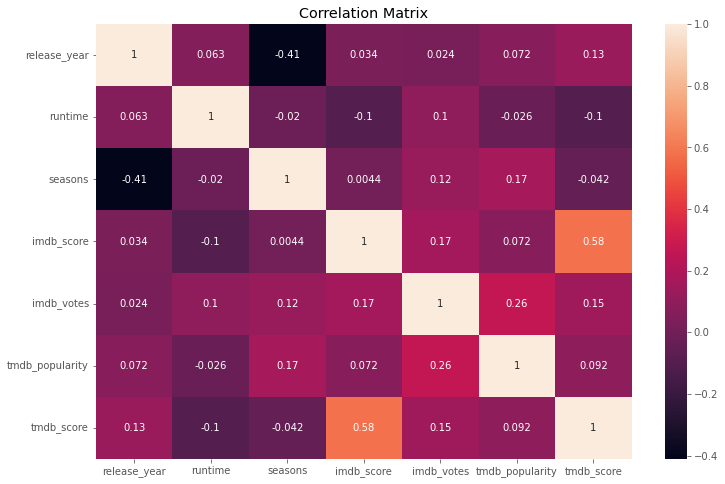

In [6]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show

In [7]:
# Give everything unique character

df_numerize = df

for col_name in df_numerize.columns:
    if(df_numerize[col_name].dtype== 'object'):
        df_numerize[col_name] = df_numerize[col_name].astype('category')
        df_numerize[col_name] = df_numerize[col_name].cat.codes
            
df_numerize

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,8789,8615,1,7742,1934,8,19,390,475,26.0,3212,8.6,1092.0,15.424,7.6
1,2855,7838,0,4039,1926,-1,78,101,475,NaN,59,8.2,89766.0,8.647,8.0
2,7190,7480,0,5478,1946,-1,171,1505,475,NaN,665,8.1,63026.0,8.435,7.8
3,7375,3557,0,4852,1940,-1,92,362,475,NaN,476,7.8,57835.0,11.270,7.4
4,6157,3823,0,2745,1950,-1,94,1811,475,NaN,868,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,5874,4535,0,3752,2021,-1,93,1036,475,NaN,8341,5.3,20.0,1.406,NaN
9867,584,4026,0,7379,2021,-1,55,496,475,NaN,4920,NaN,NaN,0.600,NaN
9868,7439,1649,0,465,2021,-1,116,583,266,NaN,-1,NaN,NaN,1.960,NaN
9869,398,888,0,8543,2021,-1,72,1064,496,NaN,4728,8.4,49.0,0.645,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

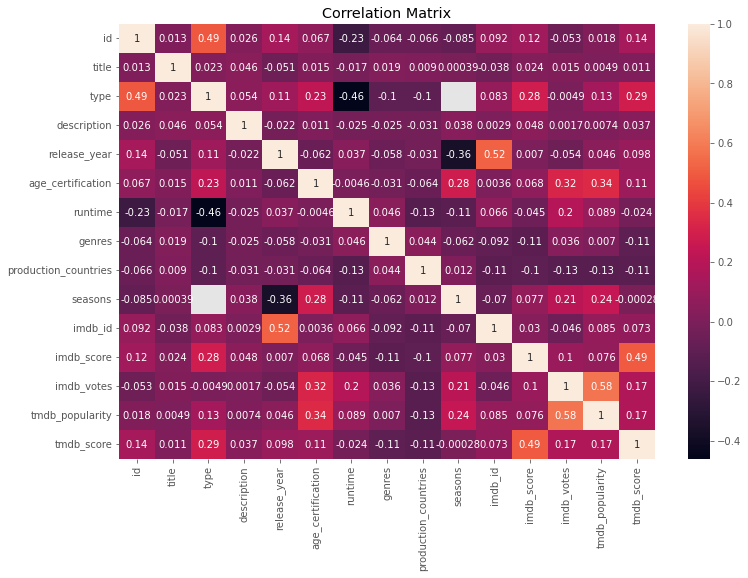

In [8]:
correlation_matrix = df_numerize.corr(method = 'kendall')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show

<AxesSubplot:xlabel='imdb_votes', ylabel='tmdb_popularity'>

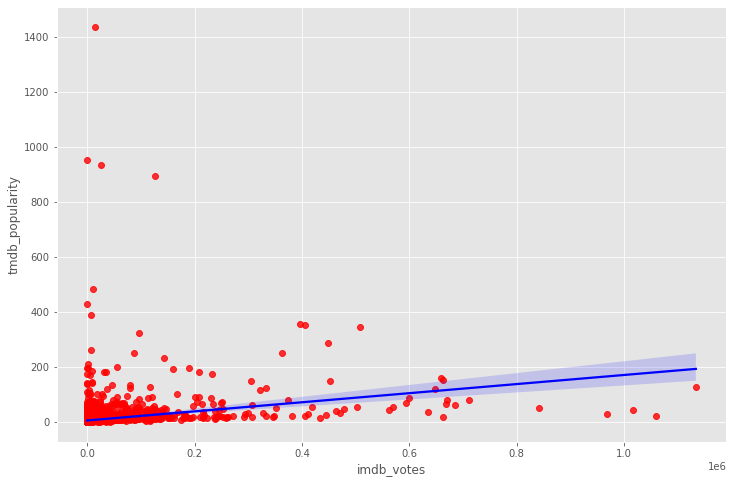

In [9]:
# Plot the lost Status vs the Case Count
sns.regplot(x='imdb_votes', y='tmdb_popularity', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})